## PROJECT NAME : HOUSE PRICES : ADVANCED REGRESSION TECHNIQUE
This project aims to predict house prices based on various features

### Data scientist lifecycle
1. Data anlysis
2. Feature enginering
3. Feature selection
4. Model Building

In [3]:
## data analysis phase
## to understand more about the data

# loading all the libraries required
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## display all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)



<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
C:\Users\USER\AppData\Local\Temp\ipykernel_3284\1156149421.py:14: SyntaxWarning: invalid escape sequence '\d'
  dataset = pd.read_csv("..\data\AmesHousing.csv")


In [11]:
dataset = pd.read_csv("..\data\AmesHousing.csv")

rows, columm= dataset.shape

print('dataset has {} rows and {} columns'.format(rows, columm))

dataset has 2930 rows and 82 columns


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\USER\AppData\Local\Temp\ipykernel_3284\547477649.py:1: SyntaxWarning: invalid escape sequence '\d'
  dataset = pd.read_csv("..\data\AmesHousing.csv")


In [12]:
dataset.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


what we will do exploration data analysisj
1. missing values
2. all the numerical variables
3. distribution of the numerical variables
4. categorical variables
5. cardinality of the categorical variables 
6. outliers
7. Correlation analysis between numerical features
8. Relationship between independent and dependent features(SalePrice)

In [38]:
# checking missing values in the dataset

missing_value_percent = dataset.isnull().mean().sort_values(ascending = False) * 100

for column, percent in missing_value_percent.items() :
  if percent > 0:
    percent_round = np.round(percent, 3)
    print(f'{column} has {percent_round} % missing values')

Pool QC has 99.556 % missing values
Misc Feature has 96.382 % missing values
Alley has 93.242 % missing values
Fence has 80.478 % missing values
Mas Vnr Type has 60.58 % missing values
Fireplace Qu has 48.532 % missing values
Lot Frontage has 16.724 % missing values
Garage Qual has 5.427 % missing values
Garage Yr Blt has 5.427 % missing values
Garage Cond has 5.427 % missing values
Garage Finish has 5.427 % missing values
Garage Type has 5.358 % missing values
Bsmt Exposure has 2.833 % missing values
BsmtFin Type 2 has 2.765 % missing values
Bsmt Qual has 2.73 % missing values
Bsmt Cond has 2.73 % missing values
BsmtFin Type 1 has 2.73 % missing values
Mas Vnr Area has 0.785 % missing values
Bsmt Full Bath has 0.068 % missing values
Bsmt Half Bath has 0.068 % missing values
Total Bsmt SF has 0.034 % missing values
BsmtFin SF 1 has 0.034 % missing values
BsmtFin SF 2 has 0.034 % missing values
Garage Area has 0.034 % missing values
Garage Cars has 0.034 % missing values
Bsmt Unf SF has

Text(0.5, 0, 'percentage')

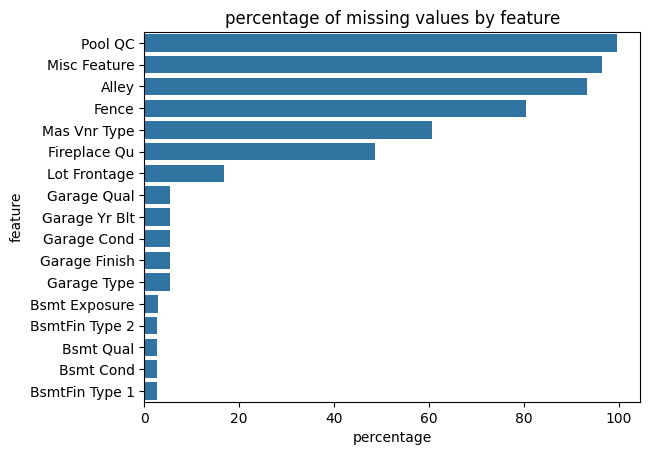

In [35]:
#visualize missing values

missing_value_percent = missing_value_percent[missing_value_percent > 0]
plt.Figure(figsize= (10,12))
sns.barplot(x = missing_value_percent.values, y = missing_value_percent.index)
plt.title('percentage of missing values by feature')
plt.ylabel('feature')
plt.xlabel('percentage')

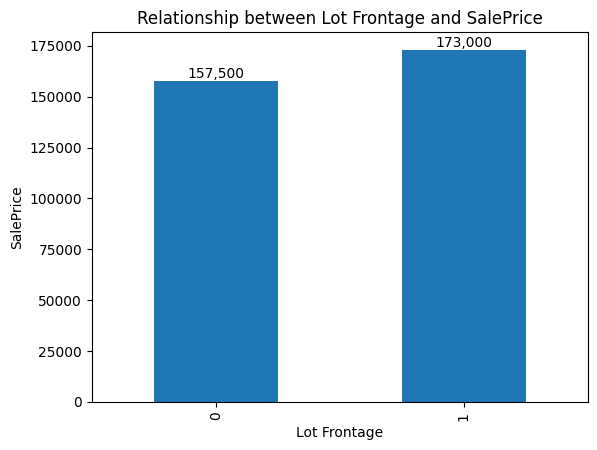

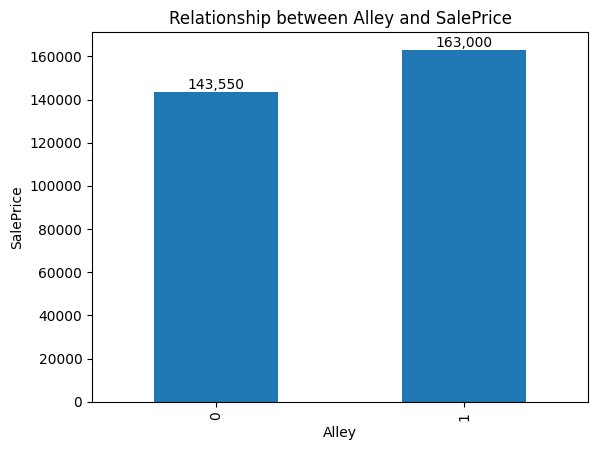

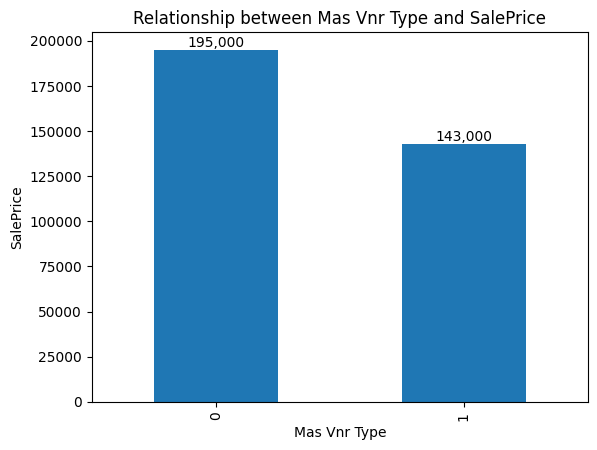

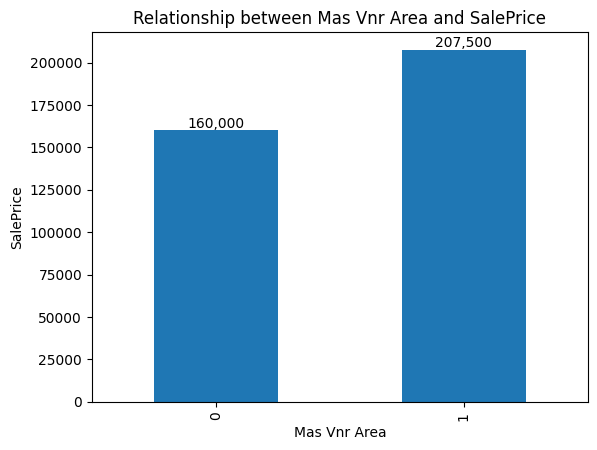

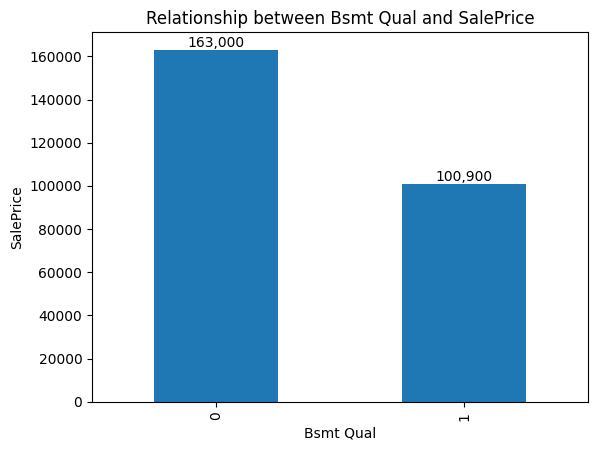

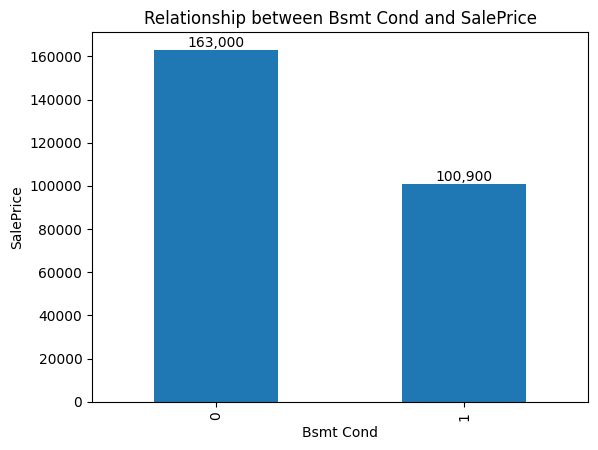

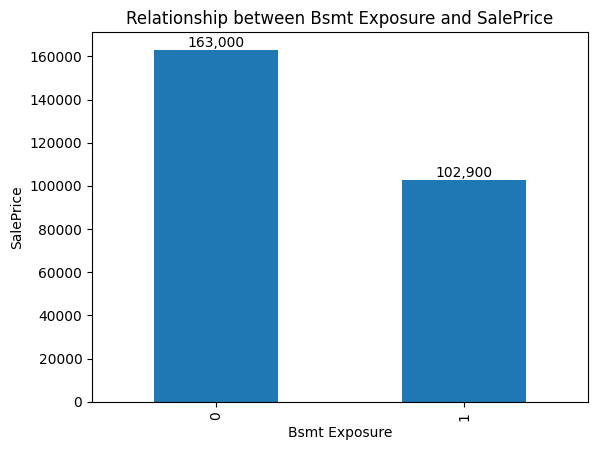

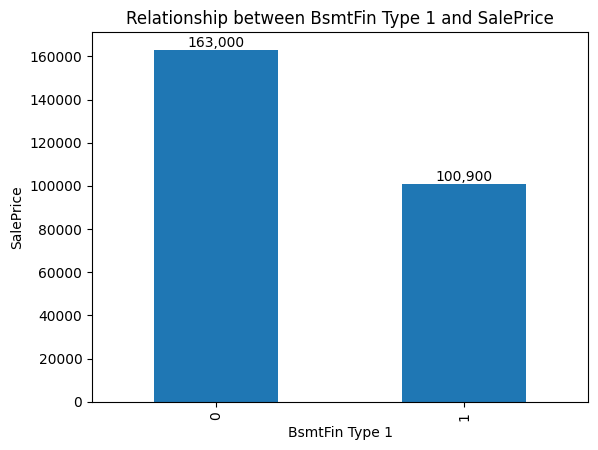

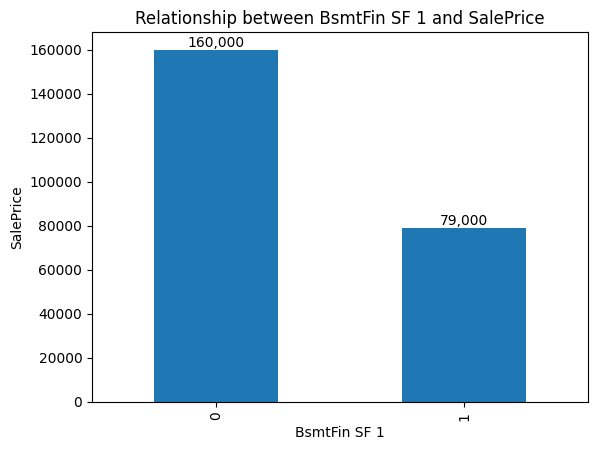

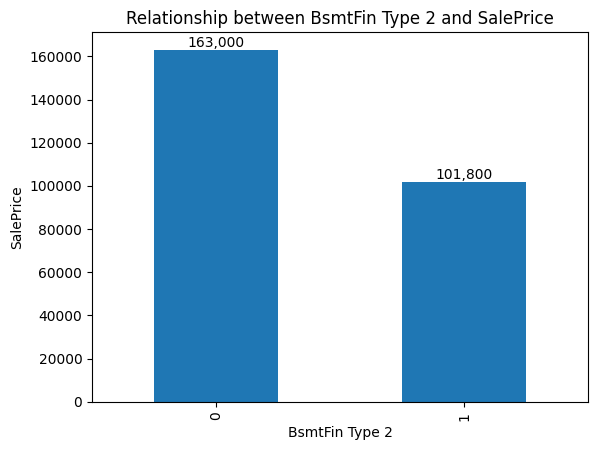

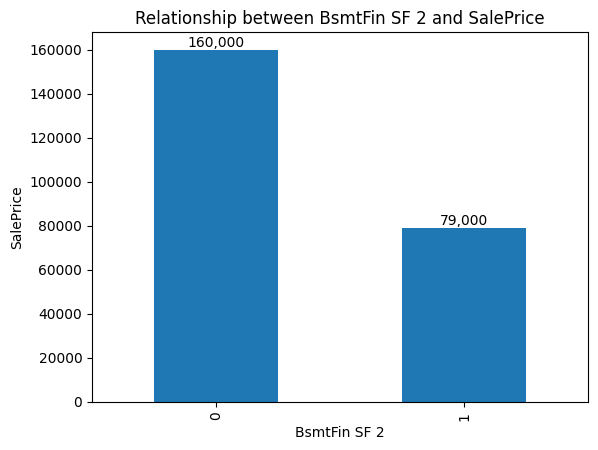

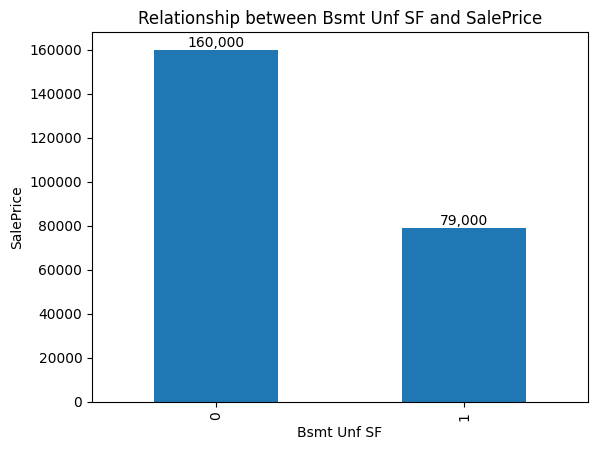

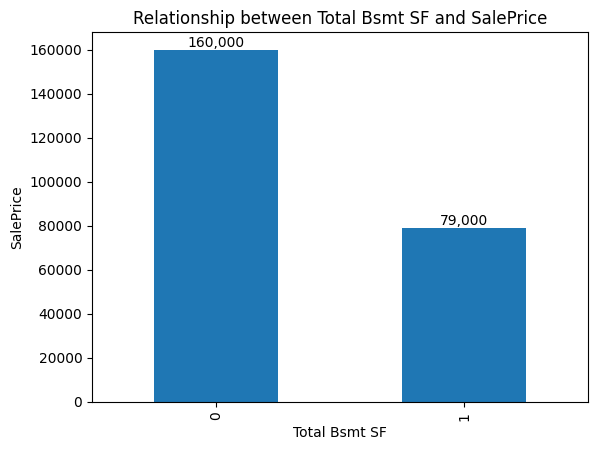

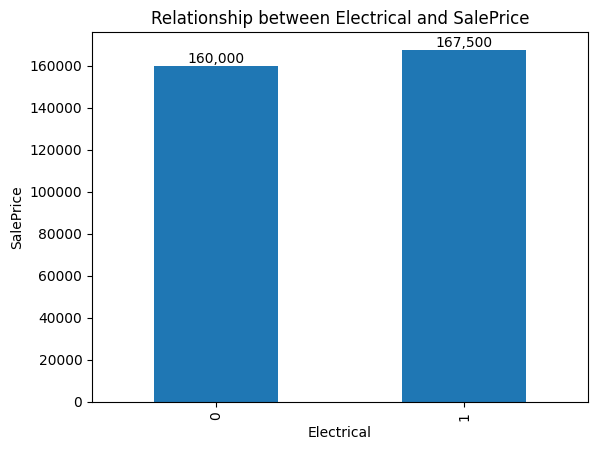

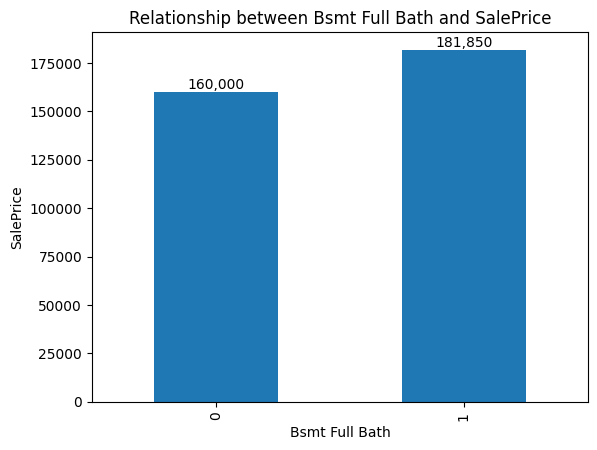

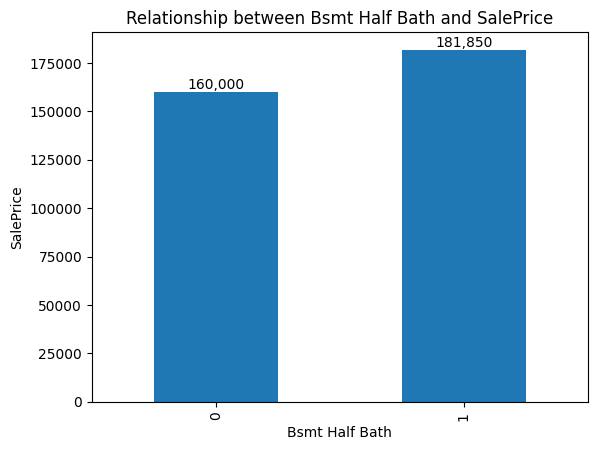

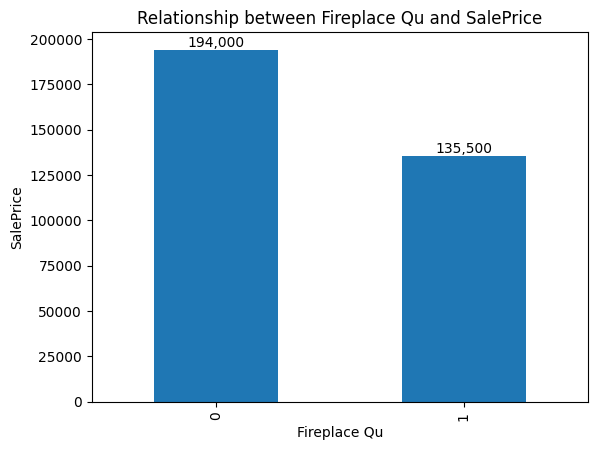

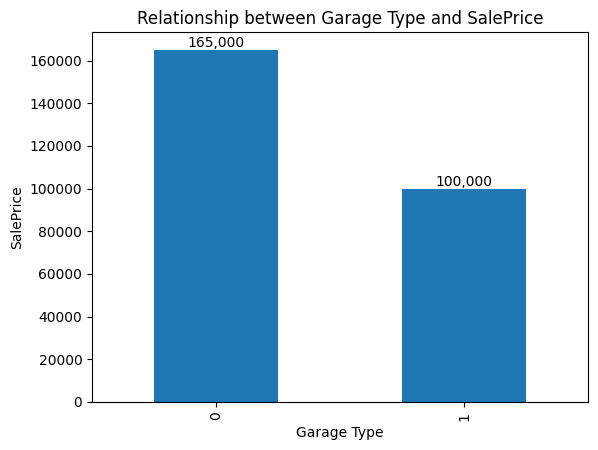

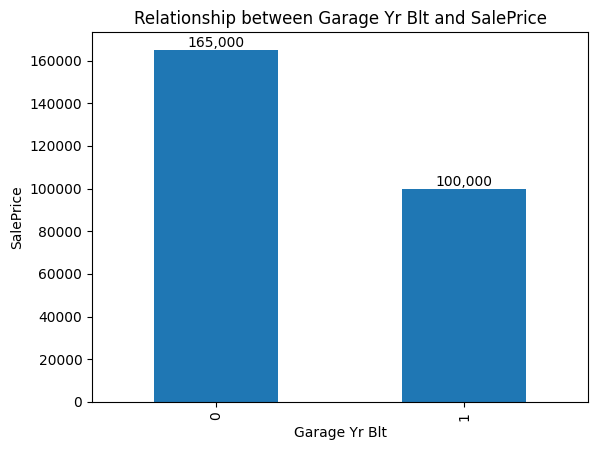

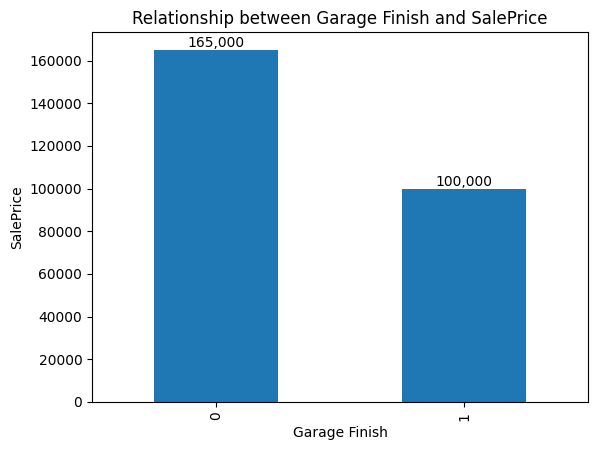

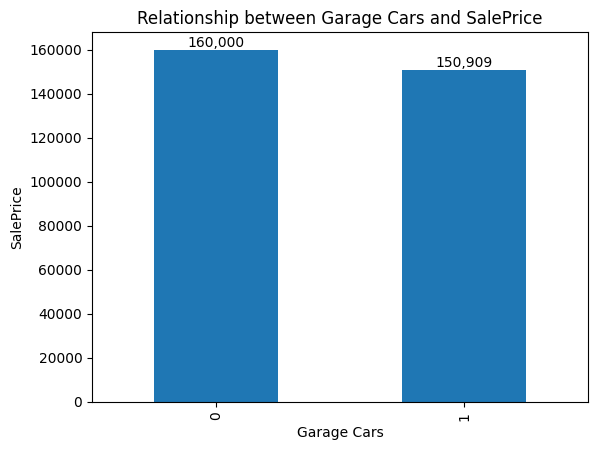

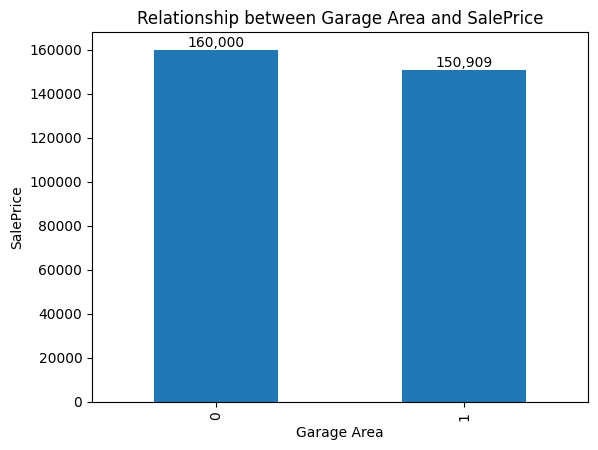

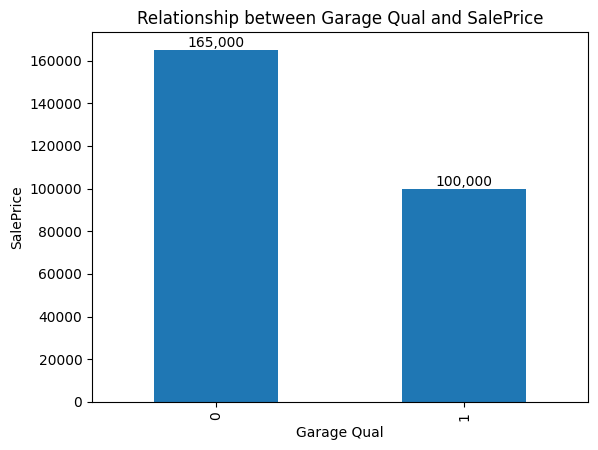

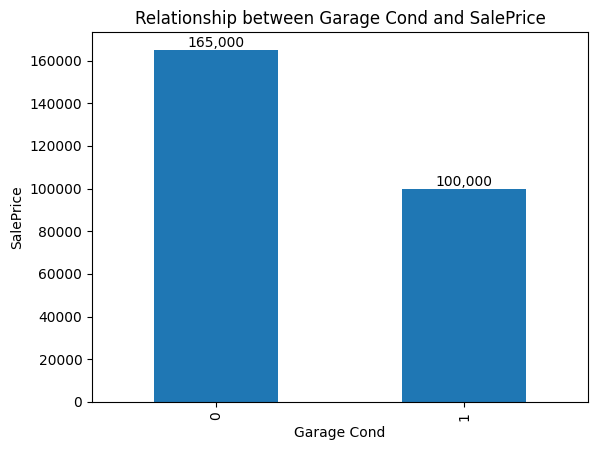

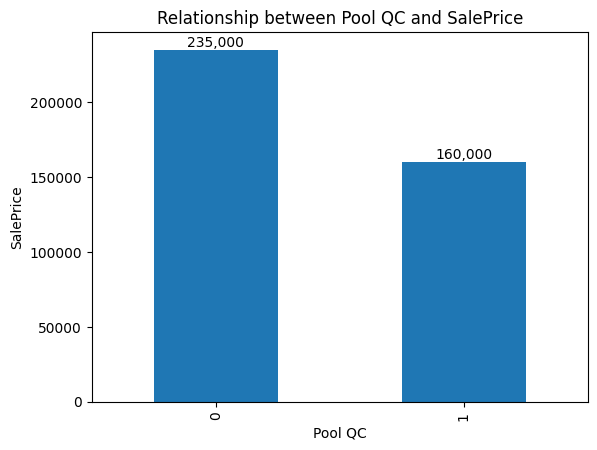

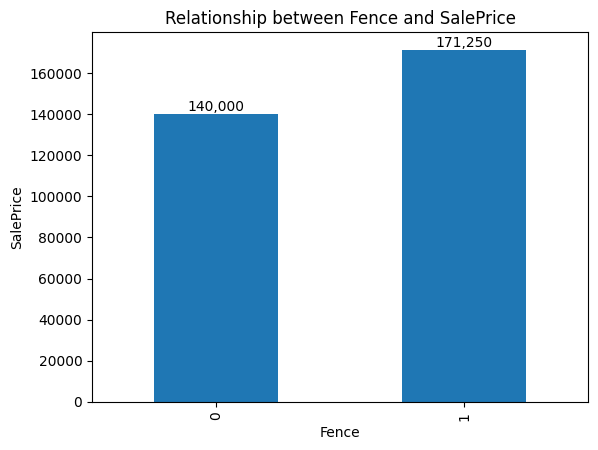

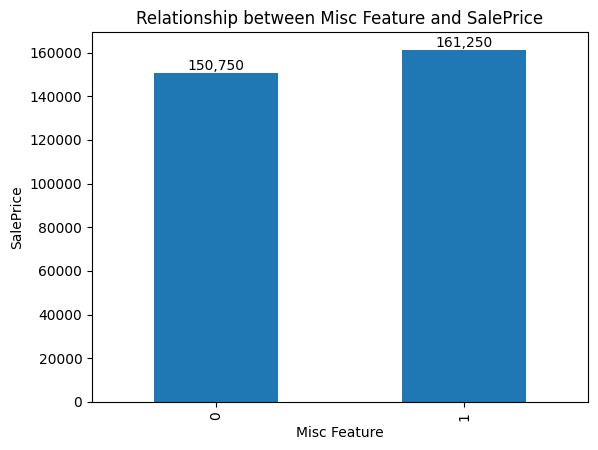

In [49]:

feature_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum() >= 1]

for feature in feature_with_na:
    data = dataset.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # Grouping and computing median
    grouped = data.groupby(feature)['SalePrice'].median()

    # Plotting
    ax = grouped.plot.bar()
    plt.title(f'Relationship between {feature} and SalePrice')
    plt.ylabel("SalePrice")
    plt.xlabel(feature)

    # Adding text labels above bars
    for idx, val in enumerate(grouped):
        ax.text(idx, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=10)

    plt.show()


This technique, known as 'missingness as information', explores the relationship between missing values and SalePrice. In this dataset, the relationship is clearly evident, indicating that the missingness should be addressed appropriately during feature engineering

### Numerical Variables

In [59]:
num_col = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']


print(f'number of numerical variable is {len(num_col)}')
dataset[num_col]

number of numerical variable is 39


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,1984.0,2.0,588.0,120,0,0,0,0,0,0,3,2006,142500
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,1983.0,2.0,484.0,164,0,0,0,0,0,0,6,2006,131000
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006,132000
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,1975.0,2.0,418.0,240,38,0,0,0,0,0,4,2006,170000


### Temporal Variable (datetime variables)
A temporal variable is any variable related to time, and it’s often transformed into more meaningful features (like age or elapsed time) during feature engineerin

In the Ames dataset, **YearBuilt**, **YearRemodAdd**, **GarageYrBlt**, and **YrSold** are temporal variables. These help us derive meaningful features like house age, renovation age, and seasonality, all of which can improve model performance.

In [67]:
temporal_feature = [feature for feature in num_col if 'Yr' in feature or 'Year' in feature ]

temporal_feature

dataset[temporal_feature]

,Year Built,Year Remod/Add,Garage Yr Blt,Yr Sold
0,1960,1960,1960.0,2010
1,1961,1961,1961.0,2010
2,1958,1958,1958.0,2010
3,1968,1968,1968.0,2010
4,1997,1998,1997.0,2010
...,...,...,...,...
2925,1984,1984,1984.0,2006
2926,1983,1983,1983.0,2006
2927,1992,1992,NaN,2006
2928,1974,1975,1975.0,2006


Text(0.5, 1.0, 'house price vs year sold')

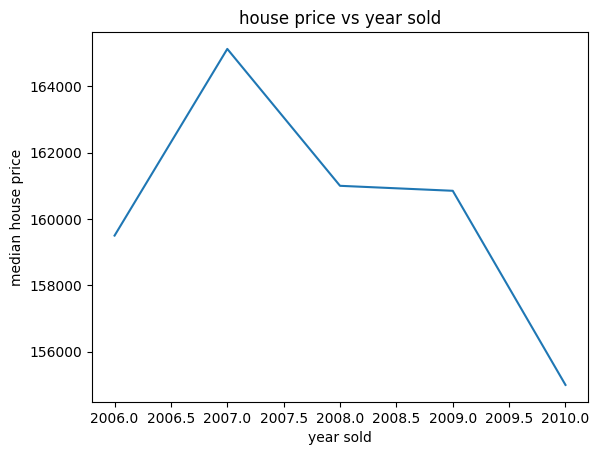

In [71]:
dataset.groupby('Yr Sold')['SalePrice'].median().plot()
plt.xlabel('year sold')
plt.ylabel('median house price')
plt.title('house price vs year sold')

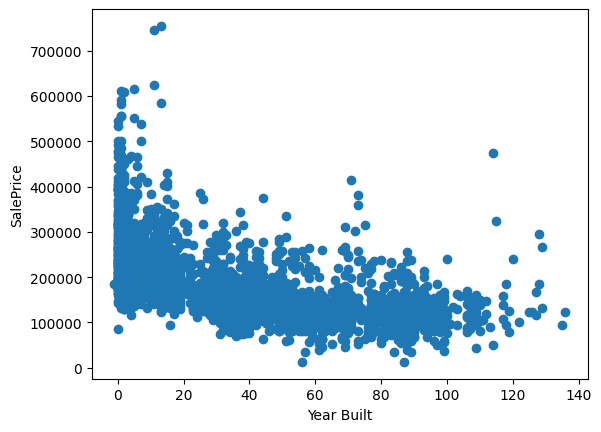

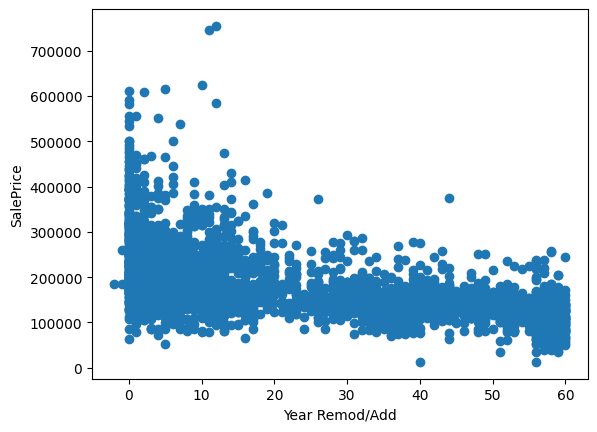

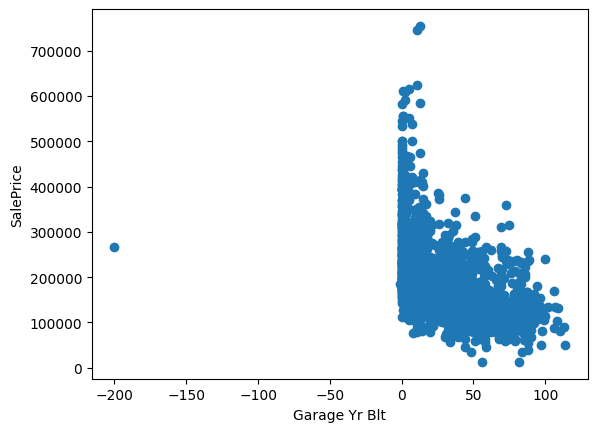

In [73]:
## comparing all temporal_feature with SalePrice

for feature in temporal_feature:
  if feature != 'Yr Sold':
    data = dataset.copy()

    data[feature] = data['Yr Sold'] - data[feature]

    plt.scatter(data[feature], data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

The scatter plot shows a clear inverse relationship between house age and sale price. Newer houses tend to sell at higher prices, while older homes are generally priced lower. There are also some outliers worth exploring, and the data is concentrated mostly in homes aged between 0 and 80 years.